In [1]:
# Importing the essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Load the dataset
path = "/Users/nithinrajulapati/Downloads/heart_disease_predictor/data/raw/cardio_train.csv"
df = pd.read_csv(path)

# Display first few rows
df.head()


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [2]:
df = pd.read_csv('/Users/nithinrajulapati/Downloads/heart_disease_predictor/data/raw/cardio_train.csv', sep=';') # For the strucured way 

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Convert age from days to years
df['age'] = (df['age'] / 365).astype(int)

# Check for nulls
print("Null values in dataset:\n", df.isnull().sum())

# Basic info
df.info()


Null values in dataset:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dt

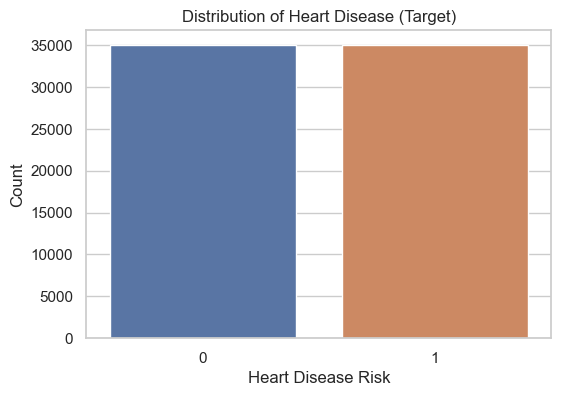

In [4]:
# Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='cardio')
plt.title('Distribution of Heart Disease (Target)')
plt.xlabel('Heart Disease Risk')
plt.ylabel('Count')
plt.show()


In [5]:
# Drop the 'id' column
df.drop(columns=['id'], inplace=True)

# Optional sanity check: Remove impossible values
df = df[(df['ap_hi'] >= 80) & (df['ap_lo'] >= 40) & (df['ap_hi'] < 250) & (df['ap_lo'] < 200)]

# Check shape after cleaning
print("Dataset shape after removing invalid BP values:", df.shape)

# Define features and target
X = df.drop('cardio', axis=1)
y = df['cardio']


Dataset shape after removing invalid BP values: (68758, 12)


# Logistic Regression OWN build

In [6]:
from sklearn.preprocessing import StandardScaler

# Define features and target again
X = df.drop('cardio', axis=1)
y = df['cardio']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
import numpy as np

# Convert DataFrame to NumPy arrays
X_np = X_scaled
y_np = y.values.reshape(-1, 1)

# Train-test split manually (80/20)
split = int(0.8 * len(X_np))
X_train, X_test = X_np[:split], X_np[split:]
y_train, y_test = y_np[:split], y_np[split:]


In [8]:
# Initialize weights and bias
def initialize_weights(n_features):
    W = np.zeros((n_features, 1))
    b = 0
    return W, b

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward + Loss + Gradients
def propagate(W, b, X, y):
    m = X.shape[0]
    
    # Forward
    A = sigmoid(np.dot(X, W) + b)
    cost = -np.mean(y * np.log(A + 1e-8) + (1 - y) * np.log(1 - A + 1e-8))
    
    # Backward
    dW = np.dot(X.T, (A - y)) / m
    db = np.sum(A - y) / m
    
    return dW, db, cost

# Training loop
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    n_features = X.shape[1]
    W, b = initialize_weights(n_features)
    cost_history = []

    for i in range(epochs):
        dW, db, cost = propagate(W, b, X, y)
        W -= lr * dW
        b -= lr * db
        
        if i % 100 == 0:
            cost_history.append(cost)
            print(f"Epoch {i} - Cost: {cost:.4f}")

    return W, b, cost_history


In [9]:
# Train the model
W_final, b_final, costs = train_logistic_regression(X_train, y_train, lr=0.01, epochs=1000)


Epoch 0 - Cost: 0.6931
Epoch 100 - Cost: 0.6227
Epoch 200 - Cost: 0.5942
Epoch 300 - Cost: 0.5808
Epoch 400 - Cost: 0.5738
Epoch 500 - Cost: 0.5697
Epoch 600 - Cost: 0.5672
Epoch 700 - Cost: 0.5656
Epoch 800 - Cost: 0.5644
Epoch 900 - Cost: 0.5636


In [10]:
# Prediction function
def predict(X, W, b, threshold=0.5):
    A = sigmoid(np.dot(X, W) + b)
    return (A >= threshold).astype(int)

# Evaluate model
y_pred = predict(X_test, W_final, b_final)
accuracy = np.mean(y_pred == y_test)
print(f"\nLogistic Regression (Scratch) Accuracy: {accuracy:.4f}")



Logistic Regression (Scratch) Accuracy: 0.7206


 # KNN from Scratch (K-Nearest Neighbors)

In [11]:
from collections import Counter

# Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN classifier (no training phase)
class KNN:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions).reshape(-1, 1)
    
    def _predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        majority_vote = Counter(k_nearest_labels.flatten()).most_common(1)[0][0]
        return majority_vote


In [12]:
# Instantiate and evaluate
knn_model = KNN(k=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

knn_accuracy = np.mean(knn_preds == y_test)
print(f"KNN (Scratch) Accuracy: {knn_accuracy:.4f}")


KNN (Scratch) Accuracy: 0.6891


# Decision Tree from Scratch

# (i) Gini Impurity + Best Split Functions

In [13]:
# Gini Impurity
def gini_index(groups, classes):
    n_instances = sum([len(group) for group in groups])
    gini = 0.0
    
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        _, labels = group[:, :-1], group[:, -1]
        for class_val in classes:
            p = np.sum(labels == class_val) / size
            score += p * p
        gini += (1 - score) * (size / n_instances)
    
    return gini


In [14]:
# Split the dataset based on a feature and threshold
def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return np.array(left), np.array(right)


In [15]:
# Select the best feature and threshold to split on
def get_best_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    best_index, best_value, best_score, best_groups = 999, 999, 999, None
    
    for index in range(dataset.shape[1] - 1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < best_score:
                best_index, best_value, best_score, best_groups = index, row[index], gini, groups
    
    return {
        'index': best_index,
        'value': best_value,
        'groups': best_groups
    }


# (ii) Tree Construction

In [16]:
# Create a terminal leaf node
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Recursive split of nodes
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])

    # Check for no split
    if left.size == 0 or right.size == 0:
        combined = np.vstack((left, right))
        node['left'] = node['right'] = to_terminal(combined)
        return

    # Check max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return

    # Left split
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_best_split(left)
        split(node['left'], max_depth, min_size, depth + 1)

    # Right split
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_best_split(right)
        split(node['right'], max_depth, min_size, depth + 1)


In [17]:
class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=5, min_size=10):
        self.max_depth = max_depth
        self.min_size = min_size
        self.root = None

    def fit(self, X, y):
        dataset = np.hstack((X, y))
        self.root = get_best_split(dataset)
        split(self.root, self.max_depth, self.min_size, 1)

    def _predict_row(self, node, row):
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self._predict_row(node['left'], row)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self._predict_row(node['right'], row)
            else:
                return node['right']

    def predict(self, X):
        return np.array([self._predict_row(self.root, row) for row in X]).reshape(-1, 1)


In [18]:
# TEMP: Use 3000 rows for development testing
X_small = X_train[:3000]
y_small = y_train[:3000]

dt_model = DecisionTreeClassifierScratch(max_depth=6, min_size=10)
dt_model.fit(X_small, y_small)

dt_preds = dt_model.predict(X_test[:1000])  # Speed up evaluation too
dt_accuracy = np.mean(dt_preds == y_test[:1000])
print(f"Decision Tree (Scratch, Sample) Accuracy: {dt_accuracy:.4f}")


Decision Tree (Scratch, Sample) Accuracy: 0.7260


# Naive Bayes from Scratch 

In [19]:
import numpy as np

class NaiveBayesScratch:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for cls in self.classes:
            X_c = X[y.flatten() == cls]
            self.mean[cls] = np.mean(X_c, axis=0)
            self.var[cls] = np.var(X_c, axis=0)
            self.priors[cls] = X_c.shape[0] / X.shape[0]

    def _gaussian_pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean)**2 / (2 * var + 1e-9))
        denominator = np.sqrt(2 * np.pi * var + 1e-9)
        return numerator / denominator

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []

            for cls in self.classes:
                prior = np.log(self.priors[cls])
                likelihoods = np.sum(np.log(self._gaussian_pdf(cls, x)))
                posterior = prior + likelihoods
                posteriors.append(posterior)

            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions).reshape(-1, 1)


In [20]:
nb_model = NaiveBayesScratch()
nb_model.fit(X_train, y_train)

nb_preds = nb_model.predict(X_test)
nb_accuracy = np.mean(nb_preds == y_test)
print(f"Naive Bayes (Scratch) Accuracy: {nb_accuracy:.4f}")


Naive Bayes (Scratch) Accuracy: 0.7070


# Manual Ensemble Voting (Step-by-Step)

In [21]:
# Get predictions from all 4 models
log_preds = predict(X_test, W_final, b_final)
knn_preds = knn_model.predict(X_test)
dt_preds = dt_model.predict(X_test[:len(log_preds)])  # match shape
nb_preds = nb_model.predict(X_test)

# Stack predictions
combined_preds = np.hstack([log_preds, knn_preds, dt_preds, nb_preds])

# Majority vote
from scipy.stats import mode
ensemble_preds = mode(combined_preds, axis=1).mode

# Evaluate
ensemble_accuracy = np.mean(ensemble_preds == y_test[:len(ensemble_preds)])
print(f"Manual Ensemble (Scratch) Accuracy: {ensemble_accuracy:.4f}")


Manual Ensemble (Scratch) Accuracy: 0.5010


In [22]:
print("Logistic:", log_preds.shape)
print("KNN:", knn_preds.shape)
print("Decision Tree:", dt_preds.shape)
print("Naive Bayes:", nb_preds.shape)
print("Actual y_test:", y_test.shape)


Logistic: (13752, 1)
KNN: (13752, 1)
Decision Tree: (13752, 1)
Naive Bayes: (13752, 1)
Actual y_test: (13752, 1)


In [23]:
# Limit X_test and y_test to first 1000 samples for fair match
X_test_trimmed = X_test[:1000]
y_test_trimmed = y_test[:1000]

# Predict with trimmed test set
log_preds = predict(X_test_trimmed, W_final, b_final)
knn_preds = knn_model.predict(X_test_trimmed)
dt_preds = dt_model.predict(X_test_trimmed)
nb_preds = nb_model.predict(X_test_trimmed)

# Stack & majority vote
combined_preds = np.hstack([log_preds, knn_preds, dt_preds, nb_preds])
from scipy.stats import mode
ensemble_preds = mode(combined_preds, axis=1).mode

ensemble_accuracy = np.mean(ensemble_preds == y_test_trimmed)
print(f"Manual Ensemble (Scratch, Fixed) Accuracy: {ensemble_accuracy:.4f}")


Manual Ensemble (Scratch, Fixed) Accuracy: 0.5069


#  Linear SVM from Scratch

In [30]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, epochs=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Convert y to 1D array and map 0 → -1 for SVM
        y = y.reshape(-1)
        y = np.where(y == 0, -1, 1)

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for idx in range(n_samples):
                x_i = X[idx]
                y_i = y[idx]  # this is now a scalar

                condition = y_i * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y_i * x_i)
                    self.b -= self.lr * y_i

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.where(approx >= 0, 1, 0).reshape(-1, 1)


In [31]:
svm_model = LinearSVM(learning_rate=0.0001, lambda_param=0.01, epochs=1000)
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
svm_accuracy = np.mean(svm_preds == y_test)
print(f"SVM (Scratch) Accuracy: {svm_accuracy:.4f}")


SVM (Scratch) Accuracy: 0.4953


# Neural Network from Scratch (1 Hidden Layer)

In [32]:
class NeuralNetworkScratch:
    def __init__(self, input_size, hidden_size=8, lr=0.01, epochs=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lr = lr
        self.epochs = epochs
        self._init_weights()

    def _init_weights(self):
        np.random.seed(42)
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _sigmoid_derivative(self, a):
        return a * (1 - a)

    def _binary_cross_entropy(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        m = X.shape[0]
        y = y.reshape(-1, 1)

        for epoch in range(self.epochs):
            # Forward
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self._sigmoid(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self._sigmoid(Z2)

            # Loss
            loss = self._binary_cross_entropy(y, A2)

            # Backward
            dZ2 = A2 - y
            dW2 = np.dot(A1.T, dZ2) / m
            db2 = np.sum(dZ2, axis=0, keepdims=True) / m

            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self._sigmoid_derivative(A1)
            dW1 = np.dot(X.T, dZ1) / m
            db1 = np.sum(dZ1, axis=0, keepdims=True) / m

            # Update weights
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

            if epoch % 100 == 0:
                print(f"Epoch {epoch} - Loss: {loss:.4f}")

    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self._sigmoid(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self._sigmoid(Z2)
        return (A2 >= 0.5).astype(int)


In [33]:
nn_model = NeuralNetworkScratch(input_size=X_train.shape[1], hidden_size=8, lr=0.1, epochs=1000)
nn_model.fit(X_train, y_train)

nn_preds = nn_model.predict(X_test)
nn_accuracy = np.mean(nn_preds == y_test)
print(f"Neural Network (Scratch) Accuracy: {nn_accuracy:.4f}")


Epoch 0 - Loss: 0.6931
Epoch 100 - Loss: 0.6930
Epoch 200 - Loss: 0.6926
Epoch 300 - Loss: 0.6908
Epoch 400 - Loss: 0.6824
Epoch 500 - Loss: 0.6544
Epoch 600 - Loss: 0.6089
Epoch 700 - Loss: 0.5772
Epoch 800 - Loss: 0.5641
Epoch 900 - Loss: 0.5593
Neural Network (Scratch) Accuracy: 0.7214


# Ensemble voting

In [35]:
from scipy.stats import mode

# Ensure consistent input shape
X_test_trimmed = X_test[:1000]
y_test_trimmed = y_test[:1000]

# Predict from all 4 models
log_preds = predict(X_test_trimmed, W_final, b_final)
dt_preds = dt_model.predict(X_test_trimmed)
nb_preds = nb_model.predict(X_test_trimmed)
nn_preds = nn_model.predict(X_test_trimmed)

# Stack predictions
combined_preds = np.hstack([log_preds, dt_preds, nb_preds, nn_preds])

# Majority vote
ensemble_preds = mode(combined_preds, axis=1).mode

# Evaluate
ensemble_accuracy = np.mean(ensemble_preds == y_test_trimmed)
print(f"\n Final Ensemble (Scratch) Accuracy: {ensemble_accuracy:.4f}")



 Final Ensemble (Scratch) Accuracy: 0.5056


# Target Distribution

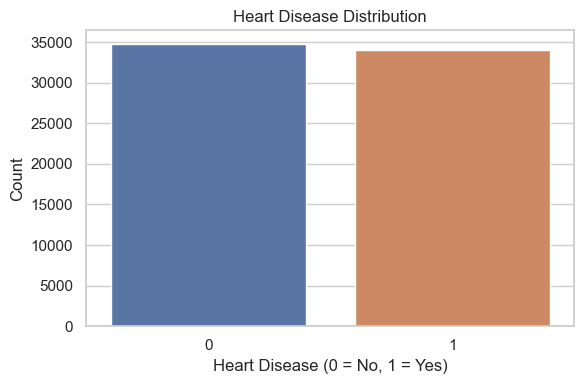

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=df)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Age vs. Heart Disease Risk

In [43]:
# Full column reset (if not already done)
df.drop(columns=['age_group', 'gender_label'], errors='ignore', inplace=True)

# Re-create clean version
df['age_group'] = pd.cut(df['age'], 
                         bins=[20, 30, 40, 50, 60, 70], 
                         labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

df['gender_label'] = df['gender'].map({1: 'Female', 2: 'Male'})

# 🔥 Convert target to category to prevent plotting errors
df['cardio'] = df['cardio'].astype(str)


/Users/nithinrajulapati/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/nithinrajulapati/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


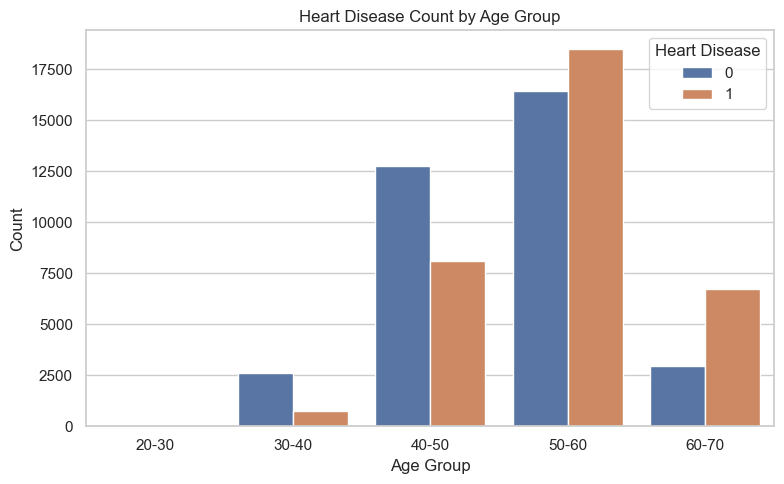

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age_group', hue='cardio')
plt.title('Heart Disease Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()


# Gender vs Heart Disease safely

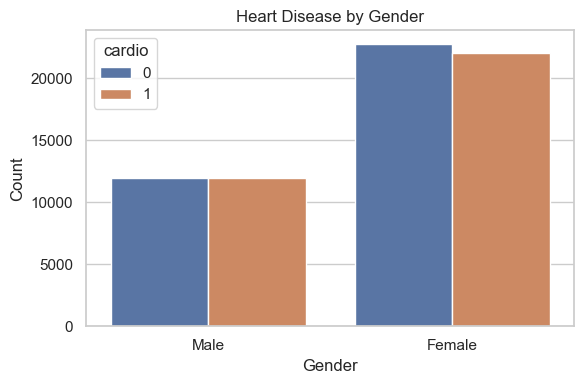

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender_label', hue='cardio')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Cholesterol & Glucose vs Heart Disease

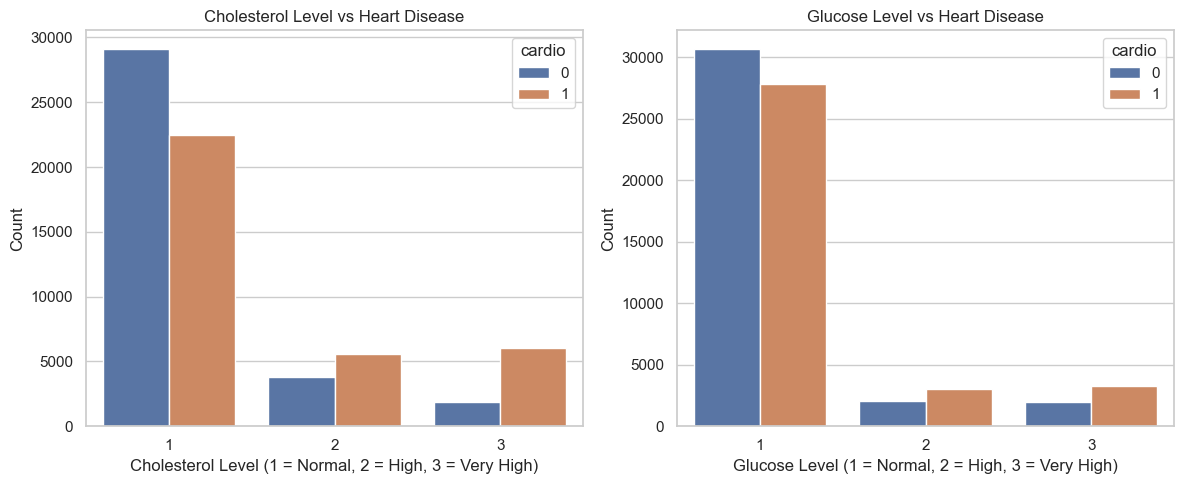

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Cholesterol
sns.countplot(data=df, x='cholesterol', hue='cardio', ax=axs[0])
axs[0].set_title('Cholesterol Level vs Heart Disease')
axs[0].set_xlabel('Cholesterol Level (1 = Normal, 2 = High, 3 = Very High)')
axs[0].set_ylabel('Count')

# Glucose
sns.countplot(data=df, x='gluc', hue='cardio', ax=axs[1])
axs[1].set_title('Glucose Level vs Heart Disease')
axs[1].set_xlabel('Glucose Level (1 = Normal, 2 = High, 3 = Very High)')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


# Correlation Heatmap

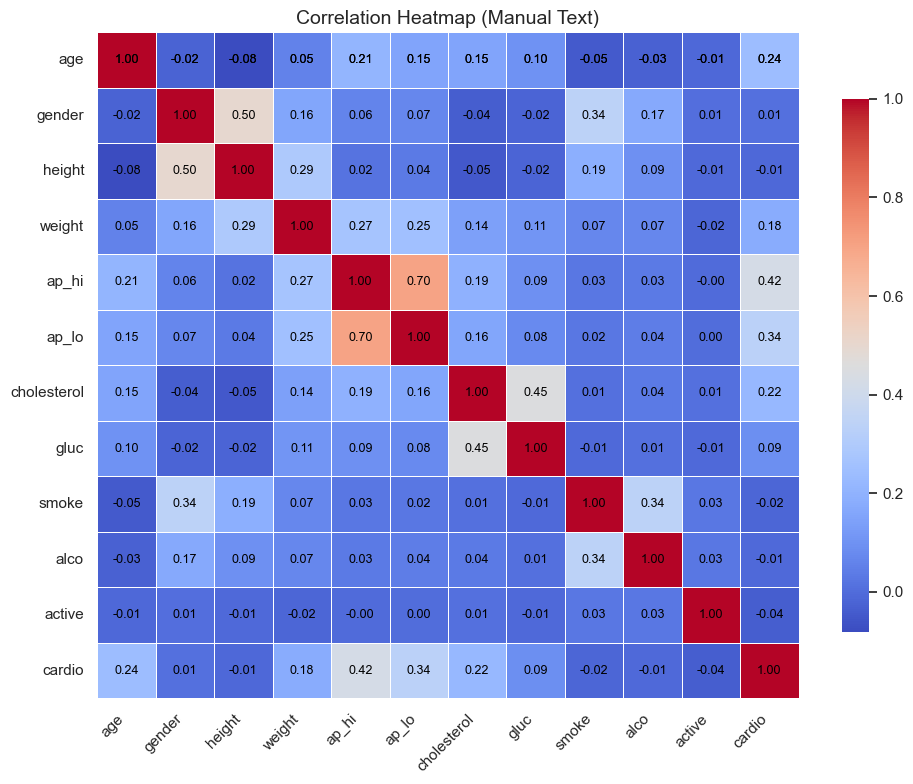

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure proper formatting
plt.figure(figsize=(10, 8))

# calculate correlation matrix
corr = df.select_dtypes(include='number').corr()

# Plot the heatmap
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"color": "black", "size": 9},  # force text style
    cbar_kws={'shrink': 0.8}
)


# PLOT
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f"{value:.2f}", 
                color='black', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap (Manual Text)", fontsize=14)
plt.tight_layout()
plt.show()



# Boxplot 

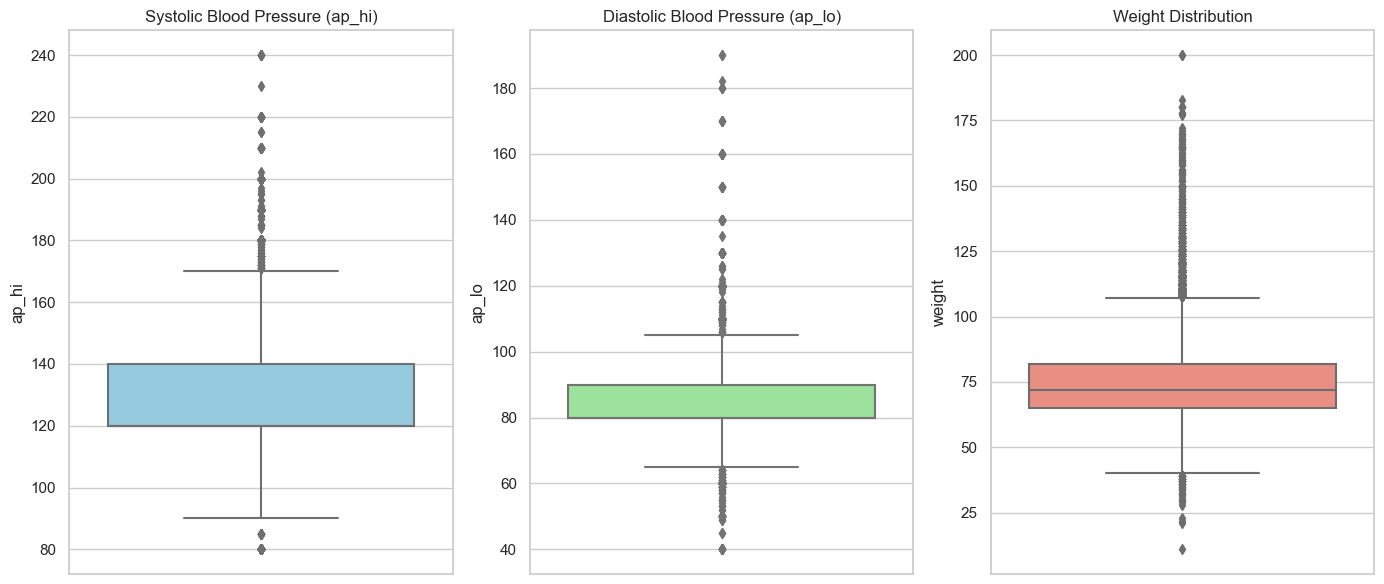

In [53]:
plt.figure(figsize=(14, 6))

# Plot 1: Systolic BP
plt.subplot(1, 3, 1)
sns.boxplot(y='ap_hi', data=df, color='skyblue')
plt.title("Systolic Blood Pressure (ap_hi)")

# Plot 2: Diastolic BP
plt.subplot(1, 3, 2)
sns.boxplot(y='ap_lo', data=df, color='lightgreen')
plt.title("Diastolic Blood Pressure (ap_lo)")

# Plot 3: Weight
plt.subplot(1, 3, 3)
sns.boxplot(y='weight', data=df, color='salmon')
plt.title("Weight Distribution")

plt.tight_layout()
plt.show()


# Height & Age Boxplots

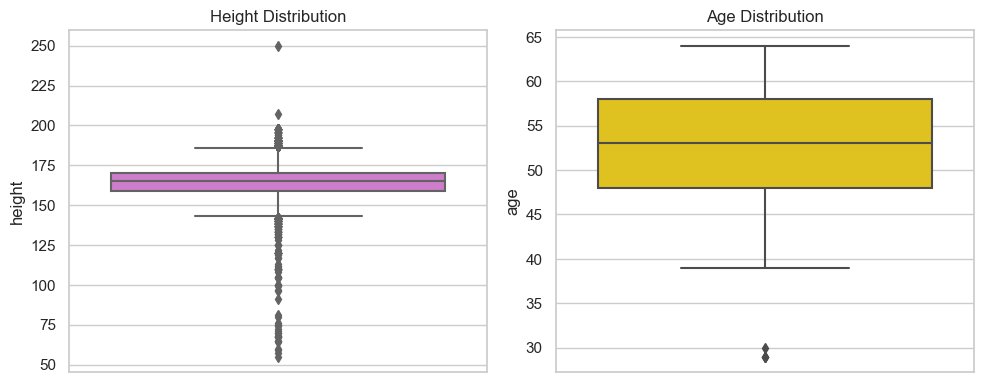

In [54]:
plt.figure(figsize=(10, 4))

# Boxplot for Height
plt.subplot(1, 2, 1)
sns.boxplot(y='height', data=df, color='orchid')
plt.title("Height Distribution")

# Boxplot for Age
plt.subplot(1, 2, 2)
sns.boxplot(y='age', data=df, color='gold')
plt.title("Age Distribution")

plt.tight_layout()
plt.show()


# Comparision between the accuracy scores

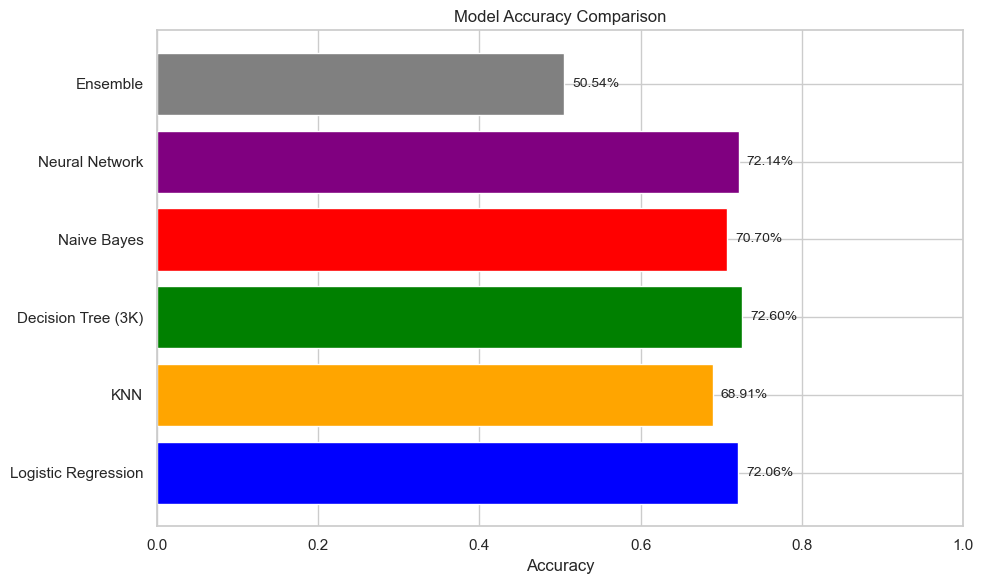

In [59]:
import matplotlib.pyplot as plt

# Accuracy values
models = ['Logistic Regression', 'KNN', 'Decision Tree (3K)', 'Naive Bayes', 'Neural Network', 'Ensemble']
accuracies = [0.7206, 0.6891, 0.7260, 0.7070, 0.7214, 0.5054]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'gray'])

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f"{width:.2%}", va='center', fontsize=10)

plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


# SAVING THE BEST MODEL OVERALL

In [71]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    W = np.zeros((n, 1))
    b = 0
    y = y.reshape(-1, 1)

    for epoch in range(epochs):
        Z = np.dot(X, W) + b
        A = sigmoid(Z)

        dW = np.dot(X.T, (A - y)) / m
        db = np.sum(A - y) / m

        W -= lr * dW
        b -= lr * db

    return W, b

# Train on full training set
W_final, b_final = train_logistic_regression(X_train, y_train, lr=0.01, epochs=1000)


In [74]:
np.savez("/Users/nithinrajulapati/Downloads/heart_disease_predictor/models/lr_weights.npz",
         W=W_final, b=b_final)
print("Logistic Regression weights saved!")


Logistic Regression weights saved!


In [76]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # whatever you used while training

# Save the scaler
joblib.dump(scaler, '/Users/nithinrajulapati/Downloads/heart_disease_predictor/models/scaler.pkl')


['/Users/nithinrajulapati/Downloads/heart_disease_predictor/models/scaler.pkl']

# Loading the saved model

In [75]:
def predict_from_weights(X, path):
    data = np.load(path)
    W = data['W']
    b = data['b']
    A = sigmoid(np.dot(X, W) + b)
    return (A >= 0.5).astype(int)

# Try it
lr_preds = predict_from_weights(X_test, "/Users/nithinrajulapati/Downloads/heart_disease_predictor/models/lr_weights.npz")
print(" Loaded LR Accuracy:", np.mean(lr_preds == y_test))


 Loaded LR Accuracy: 0.7206224549156486
